In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Read the Dataset

In [2]:
import pandas as pd


GS = pd.read_csv("C:/Users/18137/Downloads/GS.csv")

GS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-23,251.660004,252.750000,246.190002,246.669998,221.936264,3775900
1,2018-04-24,248.820007,249.149994,240.039993,242.490005,218.175400,4705100
2,2018-04-25,242.190002,242.460007,237.509995,239.229996,215.242325,5041400
3,2018-04-26,239.270004,241.660004,238.009995,240.089996,216.016052,2891100
4,2018-04-27,240.000000,241.929993,239.020004,239.800003,215.755142,2136800


In [3]:
GS

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-23,251.660004,252.750000,246.190002,246.669998,221.936264,3775900
1,2018-04-24,248.820007,249.149994,240.039993,242.490005,218.175400,4705100
2,2018-04-25,242.190002,242.460007,237.509995,239.229996,215.242325,5041400
3,2018-04-26,239.270004,241.660004,238.009995,240.089996,216.016052,2891100
4,2018-04-27,240.000000,241.929993,239.020004,239.800003,215.755142,2136800
...,...,...,...,...,...,...,...
1254,2023-04-17,336.000000,340.450012,333.679993,339.679993,339.679993,3012100
1255,2023-04-18,328.000000,336.549988,326.130005,333.910004,333.910004,7549500
1256,2023-04-19,332.980011,336.989990,331.670013,336.890015,336.890015,2625400
1257,2023-04-20,334.950012,339.309998,334.320007,338.709991,338.709991,2217900


In [4]:
#Drop the columns we don't need

GS = GS.drop(['Open', 'High', 'Low','Adj Close', 'Volume'], axis=1)

In [5]:
GS

,Date,Close
0,2018-04-23,246.669998
1,2018-04-24,242.490005
2,2018-04-25,239.229996
3,2018-04-26,240.089996
4,2018-04-27,239.800003
...,...,...
1254,2023-04-17,339.679993
1255,2023-04-18,333.910004
1256,2023-04-19,336.890015
1257,2023-04-20,338.709991


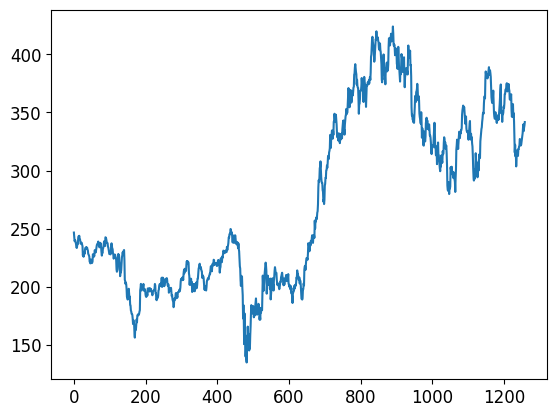

In [6]:
#Plot temp

plt.plot(GS['Close'])
plt.show()

# Data Cleanup

In [7]:
# Remove all null values

GS = GS.dropna().reset_index(drop=True)

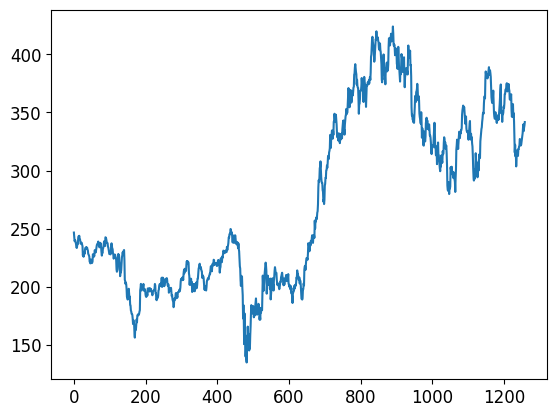

In [8]:
plt.plot(GS['Close'])
plt.show()

## RESHAPE the data set!

In [9]:
GS.shape

(1259, 2)

In [10]:
# Note that not all days have 24 readings. Some are missing.

GS.shape[0]/24

52.458333333333336

In [11]:
GS.groupby(['Date']).count()

,Close
Date,
2018-04-23,1
2018-04-24,1
2018-04-25,1
2018-04-26,1
2018-04-27,1
...,...
2023-04-17,1
2023-04-18,1
2023-04-19,1


In [12]:
GS= GS[:1250]
GS

,Date,Close
0,2018-04-23,246.669998
1,2018-04-24,242.490005
2,2018-04-25,239.229996
3,2018-04-26,240.089996
4,2018-04-27,239.800003
...,...,...
1245,2023-04-03,326.519989
1246,2023-04-04,322.649994
1247,2023-04-05,321.529999
1248,2023-04-06,322.399994


In [13]:
# Re-organize the data set by day and hours

temp = np.array(GS['Close']).reshape(125,10)

temp

array([[246.669998, 242.490005, 239.229996, ..., 234.050003, 233.410004,
        234.940002],
       [237.199997, 237.      , 241.729996, ..., 240.960007, 239.100006,
        237.      ],
       [237.699997, 238.      , 237.809998, ..., 225.880005, 228.350006,
        229.889999],
       ...,
       [365.529999, 351.649994, 346.230011, ..., 349.290009, 342.089996,
        327.670013],
       [315.51001 , 322.149994, 312.190002, ..., 313.670013, 314.850006,
        312.570007],
       [318.529999, 318.440002, 320.720001, ..., 321.529999, 322.399994,
        324.959991]])

In [14]:
# Convert to dataframe

temp_df = pd.DataFrame(temp)

temp_df

,0,1,2,3,4,5,6,7,8,9
0,246.669998,242.490005,239.229996,240.089996,239.800003,238.330002,236.669998,234.050003,233.410004,234.940002
1,237.199997,237.000000,241.729996,243.440002,242.919998,243.910004,241.559998,240.960007,239.100006,237.000000
2,237.699997,238.000000,237.809998,236.100006,235.009995,227.029999,229.160004,225.880005,228.350006,229.889999
3,228.339996,232.229996,233.449997,233.389999,234.089996,232.630005,233.830002,233.649994,231.919998,231.389999
4,228.320007,227.820007,226.979996,226.020004,221.539993,221.580002,220.179993,223.419998,220.570007,223.259995
...,...,...,...,...,...,...,...,...,...,...
120,353.700012,357.459991,365.809998,365.709991,369.470001,369.950012,370.799988,374.399994,375.100006,367.989990
121,371.279999,374.019989,371.779999,374.339996,370.200012,368.500000,361.119995,360.890015,363.540009,363.850006
122,365.529999,351.649994,346.230011,349.100006,357.089996,357.049988,346.079987,349.290009,342.089996,327.670013
123,315.510010,322.149994,312.190002,315.089996,303.540009,309.529999,317.279999,313.670013,314.850006,312.570007


# Reshape for Standardizing Data

In [15]:
# Let's create a single sequence (i.e., feature) for standardization

temp_1feature = np.array(temp_df).ravel().reshape(-1,1)

temp_1feature.shape

(1250, 1)

In [16]:
temp_1feature

array([[246.669998],
       [242.490005],
       [239.229996],
       ...,
       [321.529999],
       [322.399994],
       [324.959991]])

## Standardize the values

In [17]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

temp_std = scaler.fit_transform(temp_1feature)

## Reshape the data back to 24-hour format

In [18]:
temp_reshaped = temp_std.reshape(125,10)

temp_reshaped.shape

(125, 10)

In [19]:
#Pandas version of the reshaped data

pd.DataFrame(temp_reshaped)

,0,1,2,3,4,5,6,7,8,9
0,-0.353586,-0.409264,-0.452688,-0.441232,-0.445095,-0.464676,-0.486787,-0.521686,-0.530211,-0.509831
1,-0.479728,-0.482392,-0.419387,-0.396610,-0.403537,-0.390350,-0.421652,-0.429644,-0.454419,-0.482392
2,-0.473068,-0.469071,-0.471602,-0.494380,-0.508899,-0.615193,-0.586821,-0.630511,-0.597610,-0.577098
3,-0.597744,-0.545929,-0.529678,-0.530477,-0.521153,-0.540600,-0.524616,-0.527014,-0.550058,-0.557117
4,-0.598010,-0.604670,-0.615859,-0.628646,-0.688321,-0.687788,-0.706436,-0.663279,-0.701241,-0.665410
...,...,...,...,...,...,...,...,...,...,...
120,1.072066,1.122149,1.233372,1.232040,1.282124,1.288517,1.299839,1.347792,1.357116,1.262410
121,1.306233,1.342730,1.312893,1.346992,1.291847,1.269203,1.170901,1.167837,1.203135,1.207265
122,1.229642,1.044759,0.972564,1.010793,1.117221,1.116688,0.970566,1.013324,0.917419,0.725343
123,0.563371,0.651816,0.519148,0.557776,0.403929,0.483716,0.586947,0.538862,0.554579,0.524209


# Split the Data

**In certain cases, we cannot use a random split. For example, if we are trying to predict the stock market, we cannot use a random split. We need to use a chronological split.**

BUT, keep in mind if we have something like hourly readings of dayly temperature, we can use a random split on days, but the sequence of the temperature within the day is important to remain sequential.

In this case, we are using a random spli because each day as an independent sample.

In [20]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(temp_reshaped, test_size=0.3)

# if we need to maintain the ordering of the data, we can use the following code to split the data
#split_point = int(len(temp_reshaped)*0.7)
#train, test = temp_reshaped[:split_point], temp_reshaped[split_point:]

In [21]:
train.shape

(87, 10)

In [22]:
train

array([[ 1.82625021e+00,  1.75538712e+00,  1.74979250e+00,
         1.73514070e+00,  1.81213093e+00,  1.73793780e+00,
         1.71476094e+00,  1.64456370e+00,  1.57503270e+00,
         1.39747580e+00],
       [-8.95581460e-01, -8.94782293e-01, -8.70006873e-01,
        -8.98645032e-01, -8.71738354e-01, -8.95714594e-01,
        -8.24052330e-01, -7.89553295e-01, -8.20988757e-01,
        -7.68507493e-01],
       [ 1.56624138e+00,  1.43490527e+00,  1.08138942e+00,
         9.87083202e-01,  9.97472875e-01,  9.41661583e-01,
         9.34735271e-01,  9.10225907e-01,  9.25277699e-01,
         9.03299596e-01],
       [-1.06221598e+00, -1.00693760e+00, -1.00760345e+00,
        -1.00986804e+00, -8.77199640e-01, -9.83760529e-01,
        -9.45265421e-01, -1.01746040e+00, -9.01175880e-01,
        -8.56953018e-01],
       [-4.23783148e-01, -4.50423371e-01, -4.71602294e-01,
        -4.73600231e-01, -4.74932322e-01, -5.15425380e-01,
        -5.23550648e-01, -5.50190870e-01, -5.72835019e-01,
        -6.

In [23]:
test.shape

(38, 10)

# Create Input and Target values

The first 23 hours will be input to predict the 24th hour reading (i.e., target)

In [24]:
# The first 10 columns (from 0 to 9) are inputs

train_inputs = train[:,:9]


pd.DataFrame(train_inputs, columns=np.arange(0,9,1))

,0,1,2,3,4,5,6,7,8
0,1.826250,1.755387,1.749793,1.735141,1.812131,1.737938,1.714761,1.644564,1.575033
1,-0.895581,-0.894782,-0.870007,-0.898645,-0.871738,-0.895715,-0.824052,-0.789553,-0.820989
2,1.566241,1.434905,1.081389,0.987083,0.997473,0.941662,0.934735,0.910226,0.925278
3,-1.062216,-1.006938,-1.007603,-1.009868,-0.877200,-0.983761,-0.945265,-1.017460,-0.901176
4,-0.423783,-0.450423,-0.471602,-0.473600,-0.474932,-0.515425,-0.523551,-0.550191,-0.572835
...,...,...,...,...,...,...,...,...,...
82,0.309755,0.265932,0.257274,0.225572,0.111552,0.275123,0.373559,0.597203,0.642492
83,-0.553654,-0.673535,-0.894649,-0.907969,-0.942069,-0.925418,-0.946997,-0.998945,-1.090588
84,1.554387,1.653755,1.446360,1.310628,1.426647,1.453420,1.489518,1.529478,1.523750
85,-1.280266,-1.294519,-1.264282,-1.282664,-1.210735,-1.169843,-1.199546,-1.278801,-1.350863


## Add one more dimension to make it ready for RNNs

See here for more details: https://keras.io/layers/recurrent/, and https://shiva-verma.medium.com/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e


In [25]:
train_inputs

array([[ 1.82625021e+00,  1.75538712e+00,  1.74979250e+00,
         1.73514070e+00,  1.81213093e+00,  1.73793780e+00,
         1.71476094e+00,  1.64456370e+00,  1.57503270e+00],
       [-8.95581460e-01, -8.94782293e-01, -8.70006873e-01,
        -8.98645032e-01, -8.71738354e-01, -8.95714594e-01,
        -8.24052330e-01, -7.89553295e-01, -8.20988757e-01],
       [ 1.56624138e+00,  1.43490527e+00,  1.08138942e+00,
         9.87083202e-01,  9.97472875e-01,  9.41661583e-01,
         9.34735271e-01,  9.10225907e-01,  9.25277699e-01],
       [-1.06221598e+00, -1.00693760e+00, -1.00760345e+00,
        -1.00986804e+00, -8.77199640e-01, -9.83760529e-01,
        -9.45265421e-01, -1.01746040e+00, -9.01175880e-01],
       [-4.23783148e-01, -4.50423371e-01, -4.71602294e-01,
        -4.73600231e-01, -4.74932322e-01, -5.15425380e-01,
        -5.23550648e-01, -5.50190870e-01, -5.72835019e-01],
       [-1.03437699e+00, -1.02611859e+00, -9.82961363e-01,
        -9.45931467e-01, -9.75502127e-01, -9.661780

In [26]:
train_inputs.shape 

(87, 9)

In [27]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(87, 9, 1)

In [28]:
train_x

array([[[ 1.82625021e+00],
        [ 1.75538712e+00],
        [ 1.74979250e+00],
        [ 1.73514070e+00],
        [ 1.81213093e+00],
        [ 1.73793780e+00],
        [ 1.71476094e+00],
        [ 1.64456370e+00],
        [ 1.57503270e+00]],

       [[-8.95581460e-01],
        [-8.94782293e-01],
        [-8.70006873e-01],
        [-8.98645032e-01],
        [-8.71738354e-01],
        [-8.95714594e-01],
        [-8.24052330e-01],
        [-7.89553295e-01],
        [-8.20988757e-01]],

       [[ 1.56624138e+00],
        [ 1.43490527e+00],
        [ 1.08138942e+00],
        [ 9.87083202e-01],
        [ 9.97472875e-01],
        [ 9.41661583e-01],
        [ 9.34735271e-01],
        [ 9.10225907e-01],
        [ 9.25277699e-01]],

       [[-1.06221598e+00],
        [-1.00693760e+00],
        [-1.00760345e+00],
        [-1.00986804e+00],
        [-8.77199640e-01],
        [-9.83760529e-01],
        [-9.45265421e-01],
        [-1.01746040e+00],
        [-9.01175880e-01]],

       [[-4.23783148

## Set the target

In [29]:
# The last column (9) is TARGET

train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,1.397476
1,-0.768507
2,0.903300
3,-0.856953
4,-0.600275
...,...
82,0.710291
83,-1.073804
84,1.504969
85,-1.315565


## Repeat for TEST

In [30]:
test.shape

(38, 10)

In [31]:
# The first 10 columns (from 0 to 9) are inputs

test_inputs = test[:,:9]

In [32]:
#Create an additional dimension for test

test_x = test_inputs[:,:,np.newaxis]

test_x.shape 

(38, 9, 1)

In [33]:
# The last column (9) is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,-1.016528
1,-0.523018
2,-1.017194
3,1.081389
4,-0.951526
5,1.539868
6,-0.935009
7,0.524209
8,1.559715
9,-0.665410


In [34]:
performance=pd.DataFrame({"model":[], "MSE":[]})

# A normal (cross-sectional) NN

This model assumes that the data is NOT a time-series data set. It treats the data as cross-sectional and the columns being independent of each other.

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6818
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5191
Epoch 3/100
3/3 [==============================] - 0s 0s/step - loss: 0.4086
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 0.3146
Epoch 5/100
3/3 [==============================] - 0s 0s/step - loss: 0.2525
Epoch 6/100
3/3 [==============================] - 0s 0s/step - loss: 0.2030
Epoch 7/100
3/3 [==============================] - 0s 1ms/step - loss: 0.1657
Epoch 8/100
3/3 [==============================] - 0s 0s/step - loss: 0.1342
Epoch 9/100
3/3 [==============================] - 0s 0s/step - loss: 0.1015
Epoch 10/100
3/3 [==============================] - 0s 1ms/step - loss: 0.0786
Epoch 11/100
3/3 [==============================] - 0s 0s/step - loss: 0.0585
Epoch 12/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0461
Epoch 13/100
3/3 [==============================] - 0s 0s/step - lo

### Predictions

In [36]:
#Predict:
y_pred = model.predict(test_x)

2/2 [==============================] - 0s 0s/step


In [37]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [38]:
comparison

,actual,predicted
0,196.899994,190.408539
1,233.949997,231.569717
2,196.850006,198.747025
3,354.399994,359.234711
4,201.779999,214.047150
5,388.820007,391.023254
6,203.020004,207.138931
7,312.570007,314.056519
8,390.309998,401.868042
9,223.259995,222.200836


In [39]:
MSE= mean_squared_error(comparison['actual'], comparison['predicted'])

In [40]:
performance=pd.concat([performance, pd.DataFrame({'model':'Normal NN', 'MSE': MSE}, index=[0])])

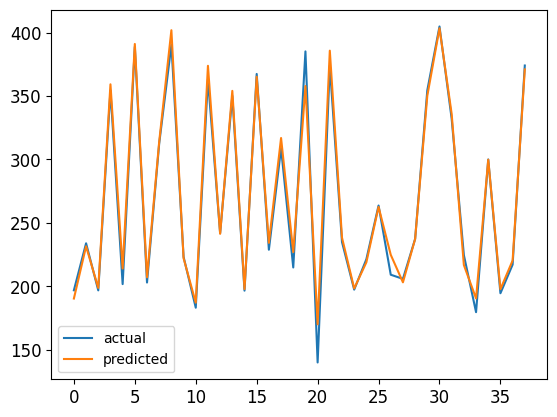

In [41]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Simple RNN

Simplest recurrent neural network

In [42]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [43]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
3/3 [==============================] - 1s 820us/step - loss: 0.7529
Epoch 2/30
3/3 [==============================] - 0s 3ms/step - loss: 0.6245
Epoch 3/30
3/3 [==============================] - 0s 869us/step - loss: 0.5271
Epoch 4/30
3/3 [==============================] - 0s 3ms/step - loss: 0.4352
Epoch 5/30
3/3 [==============================] - 0s 4ms/step - loss: 0.3630
Epoch 6/30
3/3 [==============================] - 0s 2ms/step - loss: 0.3015
Epoch 7/30
3/3 [==============================] - 0s 3ms/step - loss: 0.2457
Epoch 8/30
3/3 [==============================] - 0s 3ms/step - loss: 0.1980
Epoch 9/30
3/3 [==============================] - 0s 3ms/step - loss: 0.1513
Epoch 10/30
3/3 [==============================] - 0s 5ms/step - loss: 0.1060
Epoch 11/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 12/30
3/3 [==============================] - 0s 3ms/step - loss: 0.0376
Epoch 13/30
3/3 [==============================] - 0s 4ms/step - loss

### Predictions

In [44]:
#Predict:
y_pred = model.predict(test_x)

2/2 [==============================] - 0s 4ms/step


In [45]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [46]:
comparison

,actual,predicted
0,196.899994,195.308212
1,233.949997,232.289444
2,196.850006,199.540359
3,354.399994,363.143372
4,201.779999,201.306183
5,388.820007,385.670685
6,203.020004,203.071594
7,312.570007,318.700714
8,390.309998,397.644104
9,223.259995,222.551056


In [47]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [48]:
performance=pd.concat([performance, pd.DataFrame({'model':'Simple RNN', 'MSE': MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,81.114149
0,Simple RNN,42.659396


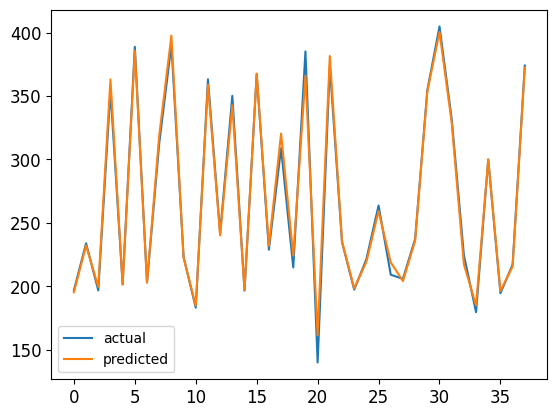

In [49]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with more layers

**Be careful: when stacking RNN layers, you have to set "return_sequences" to True. This enables the layer to send a "sequence" of values to the next layer -- jut like how it uses a sequence of values for training. However, if the output of RNN is sent to a DENSE layer, then a single value should be sent. That's why there is no "return sequences" right before DENSE layers.**

In [50]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
3/3 [==============================] - 1s 6ms/step - loss: 1.1902
Epoch 2/30
3/3 [==============================] - 0s 6ms/step - loss: 0.8322
Epoch 3/30
3/3 [==============================] - 0s 7ms/step - loss: 0.6195
Epoch 4/30
3/3 [==============================] - 0s 6ms/step - loss: 0.4740
Epoch 5/30
3/3 [==============================] - 0s 5ms/step - loss: 0.3760
Epoch 6/30
3/3 [==============================] - 0s 6ms/step - loss: 0.2860
Epoch 7/30
3/3 [==============================] - 0s 7ms/step - loss: 0.2146
Epoch 8/30
3/3 [==============================] - 0s 6ms/step - loss: 0.1651
Epoch 9/30
3/3 [==============================] - 0s 7ms/step - loss: 0.1290
Epoch 10/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0947
Epoch 11/30
3/3 [==============================] - 0s 5ms/step - loss: 0.0603
Epoch 12/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0324
Epoch 13/30
3/3 [==============================] - 0s 8ms/step - loss: 0.

### Predictions

In [52]:
#Predict:
y_pred = model.predict(test_x)


2/2 [==============================] - 0s 4ms/step


In [53]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [54]:
comparison

,actual,predicted
0,196.899994,198.784958
1,233.949997,232.419632
2,196.850006,198.142563
3,354.399994,365.259125
4,201.779999,206.807281
5,388.820007,389.267365
6,203.020004,202.425659
7,312.570007,318.672241
8,390.309998,397.458557
9,223.259995,221.647751


In [55]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [56]:
performance=pd.concat([performance, pd.DataFrame({'model':'Simple RNN with more layers', 'MSE': MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,81.114149
0,Simple RNN,42.659396
0,Simple RNN with more layers,39.563418


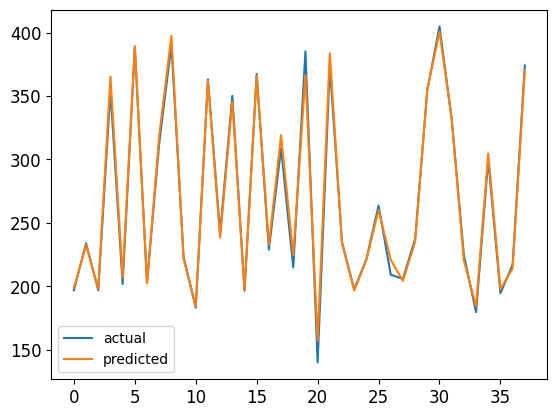

In [57]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with one layer

In [58]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
3/3 [==============================] - 1s 4ms/step - loss: 0.7783
Epoch 2/30
3/3 [==============================] - 0s 4ms/step - loss: 0.6934
Epoch 3/30
3/3 [==============================] - 0s 5ms/step - loss: 0.6157
Epoch 4/30
3/3 [==============================] - 0s 5ms/step - loss: 0.5397
Epoch 5/30
3/3 [==============================] - 0s 6ms/step - loss: 0.4719
Epoch 6/30
3/3 [==============================] - 0s 4ms/step - loss: 0.4071
Epoch 7/30
3/3 [==============================] - 0s 5ms/step - loss: 0.3443
Epoch 8/30
3/3 [==============================] - 0s 4ms/step - loss: 0.2847
Epoch 9/30
3/3 [==============================] - 0s 5ms/step - loss: 0.2300
Epoch 10/30
3/3 [==============================] - 0s 4ms/step - loss: 0.1790
Epoch 11/30
3/3 [==============================] - 0s 5ms/step - loss: 0.1342
Epoch 12/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0976
Epoch 13/30
3/3 [==============================] - 0s 5ms/step - loss: 0.

### Predictions

In [60]:
#Predict:
y_pred = model.predict(test_x)


2/2 [==============================] - 0s 1ms/step


In [61]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [62]:
comparison

,actual,predicted
0,196.899994,190.411606
1,233.949997,233.859528
2,196.850006,203.759415
3,354.399994,355.241821
4,201.779999,213.187241
5,388.820007,392.048065
6,203.020004,211.573013
7,312.570007,313.613525
8,390.309998,402.296143
9,223.259995,226.303894


In [63]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [64]:
performance=pd.concat([performance, pd.DataFrame({'model':'LSTM with one layer', 'MSE': MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,81.114149
0,Simple RNN,42.659396
0,Simple RNN with more layers,39.563418
0,LSTM with one layer,91.649689


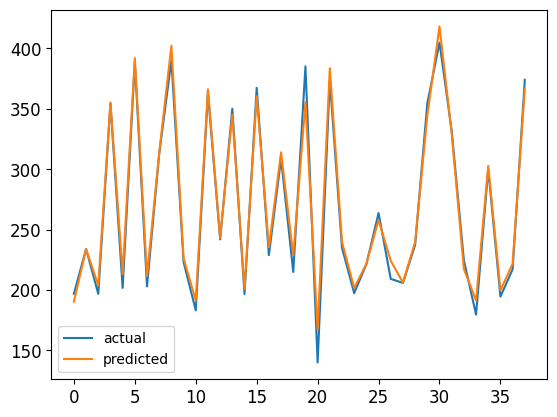

In [65]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with more layers

In [66]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [67]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
3/3 [==============================] - 3s 2ms/step - loss: 0.6345
Epoch 2/30
3/3 [==============================] - 0s 10ms/step - loss: 0.4545
Epoch 3/30
3/3 [==============================] - 0s 9ms/step - loss: 0.2970
Epoch 4/30
3/3 [==============================] - 0s 8ms/step - loss: 0.1481
Epoch 5/30
3/3 [==============================] - 0s 8ms/step - loss: 0.0595
Epoch 6/30
3/3 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 7/30
3/3 [==============================] - 0s 10ms/step - loss: 0.0468
Epoch 8/30
3/3 [==============================] - 0s 9ms/step - loss: 0.0637
Epoch 9/30
3/3 [==============================] - 0s 9ms/step - loss: 0.0564
Epoch 10/30
3/3 [==============================] - 0s 8ms/step - loss: 0.0374
Epoch 11/30
3/3 [==============================] - 0s 9ms/step - loss: 0.0259
Epoch 12/30
3/3 [==============================] - 0s 8ms/step - loss: 0.0236
Epoch 13/30
3/3 [==============================] - 0s 7ms/step - loss: 

### Predictions

In [68]:
#Predict:
y_pred = model.predict(test_x)

2/2 [==============================] - 1s 0s/step


In [69]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [70]:
comparison

,actual,predicted
0,196.899994,187.462448
1,233.949997,227.558441
2,196.850006,202.660629
3,354.399994,360.798279
4,201.779999,209.400558
5,388.820007,384.234070
6,203.020004,209.972610
7,312.570007,319.896362
8,390.309998,387.952881
9,223.259995,222.125427


In [71]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [72]:
performance=pd.concat([performance, pd.DataFrame({'model':'LSTM RNN with more layers', 'MSE': MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,81.114149
0,Simple RNN,42.659396
0,Simple RNN with more layers,39.563418
0,LSTM with one layer,91.649689
0,LSTM RNN with more layers,119.816238


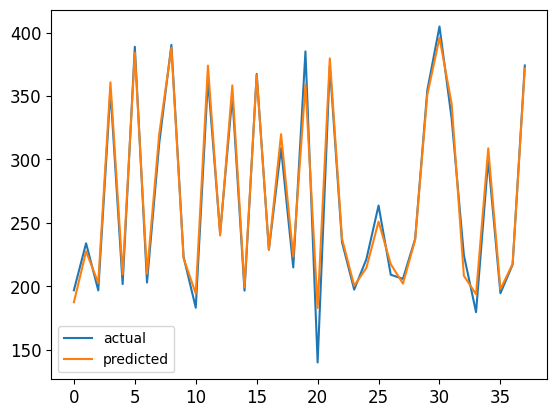

In [73]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [74]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [75]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
3/3 [==============================] - 2s 8ms/step - loss: 0.8604
Epoch 2/30
3/3 [==============================] - 0s 9ms/step - loss: 0.6642
Epoch 3/30
3/3 [==============================] - 0s 8ms/step - loss: 0.5254
Epoch 4/30
3/3 [==============================] - 0s 9ms/step - loss: 0.3946
Epoch 5/30
3/3 [==============================] - 0s 14ms/step - loss: 0.2771
Epoch 6/30
3/3 [==============================] - 0s 11ms/step - loss: 0.1809
Epoch 7/30
3/3 [==============================] - 0s 10ms/step - loss: 0.1112
Epoch 8/30
3/3 [==============================] - 0s 9ms/step - loss: 0.0609
Epoch 9/30
3/3 [==============================] - 0s 9ms/step - loss: 0.0344
Epoch 10/30
3/3 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 11/30
3/3 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 12/30
3/3 [==============================] - 0s 7ms/step - loss: 0.0158
Epoch 13/30
3/3 [==============================] - 0s 10ms/step - loss

### Predictions

In [76]:
#Predict:
y_pred = model.predict(test_x)

2/2 [==============================] - 0s 9ms/step


In [77]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()
comparison

,actual,predicted
0,196.899994,193.418121
1,233.949997,229.538330
2,196.850006,198.688522
3,354.399994,366.797943
4,201.779999,209.949585
5,388.820007,394.600647
6,203.020004,205.565536
7,312.570007,321.161469
8,390.309998,402.241760
9,223.259995,220.838898


In [78]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [79]:
performance=pd.concat([performance, pd.DataFrame({'model':'GRU with more layers', 'MSE': MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,81.114149
0,Simple RNN,42.659396
0,Simple RNN with more layers,39.563418
0,LSTM with one layer,91.649689
0,LSTM RNN with more layers,119.816238
0,GRU with more layers,63.927688


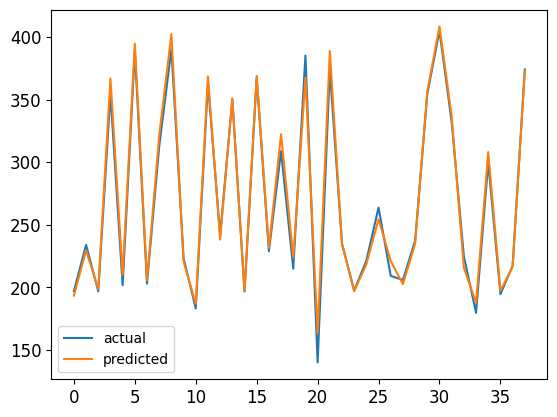

In [80]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

### Last Layer: GRU (you can change it to SimpleRNN or LSTM as well)

In [81]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [82]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
3/3 [==============================] - 2s 11ms/step - loss: 0.9803
Epoch 2/30
3/3 [==============================] - 0s 39ms/step - loss: 0.8278
Epoch 3/30
3/3 [==============================] - 0s 27ms/step - loss: 0.7115
Epoch 4/30
3/3 [==============================] - 0s 26ms/step - loss: 0.6000
Epoch 5/30
3/3 [==============================] - 0s 35ms/step - loss: 0.5087
Epoch 6/30
3/3 [==============================] - 0s 39ms/step - loss: 0.4339
Epoch 7/30
3/3 [==============================] - 0s 37ms/step - loss: 0.3747
Epoch 8/30
3/3 [==============================] - 0s 25ms/step - loss: 0.3377
Epoch 9/30
3/3 [==============================] - 0s 33ms/step - loss: 0.3021
Epoch 10/30
3/3 [==============================] - 0s 9ms/step - loss: 0.2486
Epoch 11/30
3/3 [==============================] - 0s 9ms/step - loss: 0.1824
Epoch 12/30
3/3 [==============================] - 0s 24ms/step - loss: 0.1184
Epoch 13/30
3/3 [==============================] - 0s 21ms/step

### Predictions

In [83]:
#Predict:
y_pred = model.predict(test_x)

2/2 [==============================] - 0s 0s/step


In [84]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()
comparison

,actual,predicted
0,196.899994,192.323761
1,233.949997,230.561874
2,196.850006,201.050339
3,354.399994,359.757294
4,201.779999,214.805496
5,388.820007,389.261292
6,203.020004,209.289871
7,312.570007,315.990387
8,390.309998,394.272186
9,223.259995,222.710693


In [85]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [86]:
performance=pd.concat([performance, pd.DataFrame({'model':'Conv1D', 'MSE': MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,81.114149
0,Simple RNN,42.659396
0,Simple RNN with more layers,39.563418
0,LSTM with one layer,91.649689
0,LSTM RNN with more layers,119.816238
0,GRU with more layers,63.927688
0,Conv1D,78.815587


In [87]:
performance.sort_values(by='MSE')

,model,MSE
0,Simple RNN with more layers,39.563418
0,Simple RNN,42.659396
0,GRU with more layers,63.927688
0,Conv1D,78.815587
0,Normal NN,81.114149
0,LSTM with one layer,91.649689
0,LSTM RNN with more layers,119.816238


From the above results, we can see that simple RNN with more layers has lower MSE. As we know that a better performace is always estimated by a lower MSE, simple RNN with more layers is best performing model here.